<h1> <b>Correlation의 크기를 활용한 잔여수명 예측 가능 여부 판단</b></h1>
&nbsp;

- <h3> <b>데이터 : <a href="https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/">[Turbofan Engine Degradation Simulation Data Set]</a></b></h3>

     - <h4> <b>train data : Run-to-Failure data</b> </h4>
     - <h4> <b>test data : Censored data</b> </h4>

- <h3> <b>Correlation 값의 크기를 Degradation 값으로 사용</b> </h3>
- <h3> <b>잔여수명 예측 : PoF (Physics of Failure) 기반 잔여수명 예측을 목표로 함</b> </h3>

In [1]:
# 개인 함수 불러오기
src_dir = 'E:\\R\\prototype5\\function\\'
src_file = list.files(src_dir)
for(i in 1:length(src_file)) source(paste(src_dir, src_file[i], sep=''), encoding='utf-8')

In [2]:
# data import
# Train Dataset 
trainData = read.table('E:\\데이터\\예지보전\\CMAPSSData\\train_FD001.txt')
# testDataset 
testData = read.table('E:\\데이터\\예지보전\\CMAPSSData\\test_FD001.txt')

# column name 정의
colname = c()
for(i in 0:25){
  colname = append(colname, paste0('Section-',i))
}
colnames(trainData) = colname
colnames(testData) = colname

In [5]:
# 데이터 요약
summary(trainData)

   Section-0        Section-1       Section-2           Section-3         
 Min.   :  1.00   Min.   :  1.0   Min.   :-8.70e-03   Min.   :-6.000e-04  
 1st Qu.: 26.00   1st Qu.: 52.0   1st Qu.:-1.50e-03   1st Qu.:-2.000e-04  
 Median : 52.00   Median :104.0   Median : 0.00e+00   Median : 0.000e+00  
 Mean   : 51.51   Mean   :108.8   Mean   :-8.87e-06   Mean   : 2.351e-06  
 3rd Qu.: 77.00   3rd Qu.:156.0   3rd Qu.: 1.50e-03   3rd Qu.: 3.000e-04  
 Max.   :100.00   Max.   :362.0   Max.   : 8.70e-03   Max.   : 6.000e-04  
   Section-4     Section-5       Section-6       Section-7      Section-8   
 Min.   :100   Min.   :518.7   Min.   :641.2   Min.   :1571   Min.   :1382  
 1st Qu.:100   1st Qu.:518.7   1st Qu.:642.3   1st Qu.:1586   1st Qu.:1402  
 Median :100   Median :518.7   Median :642.6   Median :1590   Median :1408  
 Mean   :100   Mean   :518.7   Mean   :642.7   Mean   :1591   Mean   :1409  
 3rd Qu.:100   3rd Qu.:518.7   3rd Qu.:643.0   3rd Qu.:1594   3rd Qu.:1415  
 Max.   :100 

In [6]:
# 변수 별 분산
apply(trainData, 2, var)

Section-0    Section-1    Section-2    Section-3    Section-4    Section-5 
8.542545e+02 4.744591e+03 4.784340e-06 8.588541e-08 0.000000e+00 0.000000e+00 
   Section-6    Section-7    Section-8    Section-9   Section-10   Section-11 
2.500533e-01 3.759099e+01 8.101089e+01 0.000000e+00 1.929279e-06 7.833883e-01 
  Section-12   Section-13   Section-14   Section-15   Section-16   Section-17 
5.038938e-03 4.876536e+02 0.000000e+00 7.133568e-02 5.439850e-01 5.172330e-03 
  Section-18   Section-19   Section-20   Section-21   Section-22   Section-23 
3.639005e+02 1.406628e-03 0.000000e+00 2.398667e+00 0.000000e+00 0.000000e+00 
  Section-24   Section-25 
3.266927e-02 1.171825e-02

In [7]:
# 분산이 0인 변수 및 불필요 변수 제거
train = trainData[,-c(which(apply(trainData, 2, var) == 0), 2,11)] 
test = testData[,-c(which(apply(trainData, 2, var) == 0), 2, 11)] 

In [8]:
head(train)

Section-0,Section-2,Section-3,Section-6,Section-7,Section-8,Section-11,Section-12,Section-13,Section-15,Section-16,Section-17,Section-18,Section-19,Section-21,Section-24,Section-25
1,-0.0007,-4e-04,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,0.0019,-3e-04,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
1,-0.0043,3e-04,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
1,0.0007,0e+00,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
1,-0.0019,-2e-04,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
1,-0.0043,-1e-04,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391,38.98,23.3669


In [9]:
head(test)

Section-0,Section-2,Section-3,Section-6,Section-7,Section-8,Section-11,Section-12,Section-13,Section-15,Section-16,Section-17,Section-18,Section-19,Section-21,Section-24,Section-25
1,0.0023,3e-04,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,-0.0027,-3e-04,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
1,0.0003,1e-04,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
1,0.0042,0e+00,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
1,0.0014,0e+00,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
1,0.0012,3e-04,642.11,1579.12,1395.13,554.22,2388.00,9050.96,47.26,521.92,2388.08,8127.46,8.4238,392,38.91,23.3467


  [1] 192 287 179 189 269 188 259 150 201 222 240 170 163 180 207 209 276 195
 [19] 158 234 195 202 168 147 230 199 156 165 163 194 234 191 200 195 181 158
 [37] 170 194 128 188 216 196 207 192 158 256 214 231 215 198 213 213 195 257
 [55] 193 275 137 147 231 172 185 180 174 283 153 202 313 199 362 137 208 213
 [73] 213 166 229 210 154 231 199 185 240 214 293 267 188 278 178 213 217 154
 [91] 135 341 155 258 283 336 202 156 185 200


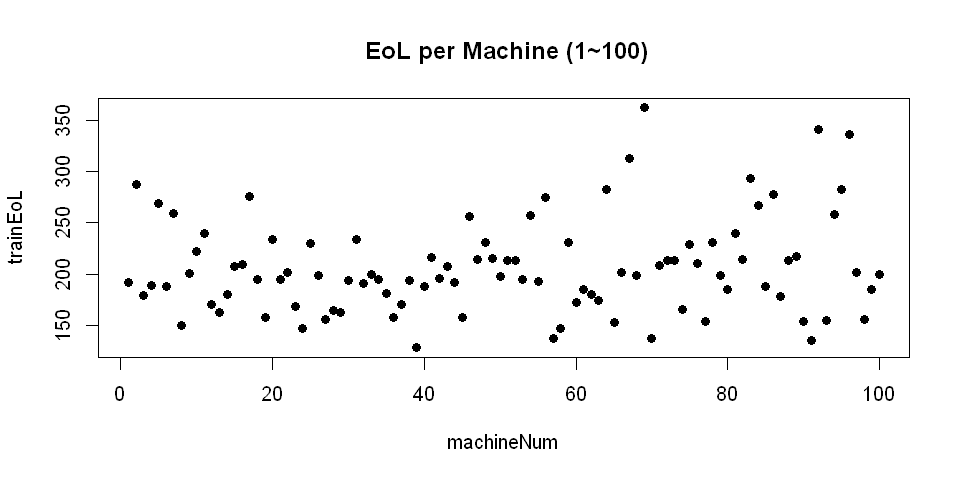

In [10]:
# Machine Number
machineNum = as.numeric(names(table(train$'Section-0')))
# EoL (End of Life)
trainEoL = as.numeric(table(train$'Section-0'))
testEoL = read.table('E:\\데이터\\예지보전\\CMAPSSData\\EoL_FD001.txt')
testEoL = testEoL$V1

# library(repr)
options(repr.plot.width = 8, repr.plot.height = 4)
plot(machineNum, trainEoL, pch=16, main = ' EoL per Machine (1~100)')
print(trainEoL)

In [11]:
# Machine 별로 데이터 보기 & 모델링을 위해 머신 정보 제거
machineNum = 1
trainM =train[train$`Section-0`== machineNum, -1]
testM =test[test$`Section-0`== machineNum, -1] 

In [12]:
head(trainM)

Section-2,Section-3,Section-6,Section-7,Section-8,Section-11,Section-12,Section-13,Section-15,Section-16,Section-17,Section-18,Section-19,Section-21,Section-24,Section-25
-0.0007,-4e-04,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
0.0019,-3e-04,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
-0.0043,3e-04,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
0.0007,0e+00,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
-0.0019,-2e-04,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
-0.0043,-1e-04,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391,38.98,23.3669


In [13]:
head(testM )

Section-2,Section-3,Section-6,Section-7,Section-8,Section-11,Section-12,Section-13,Section-15,Section-16,Section-17,Section-18,Section-19,Section-21,Section-24,Section-25
0.0023,3e-04,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
-0.0027,-3e-04,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
0.0003,1e-04,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
0.0042,0e+00,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
0.0014,0e+00,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
0.0012,3e-04,642.11,1579.12,1395.13,554.22,2388.00,9050.96,47.26,521.92,2388.08,8127.46,8.4238,392,38.91,23.3467


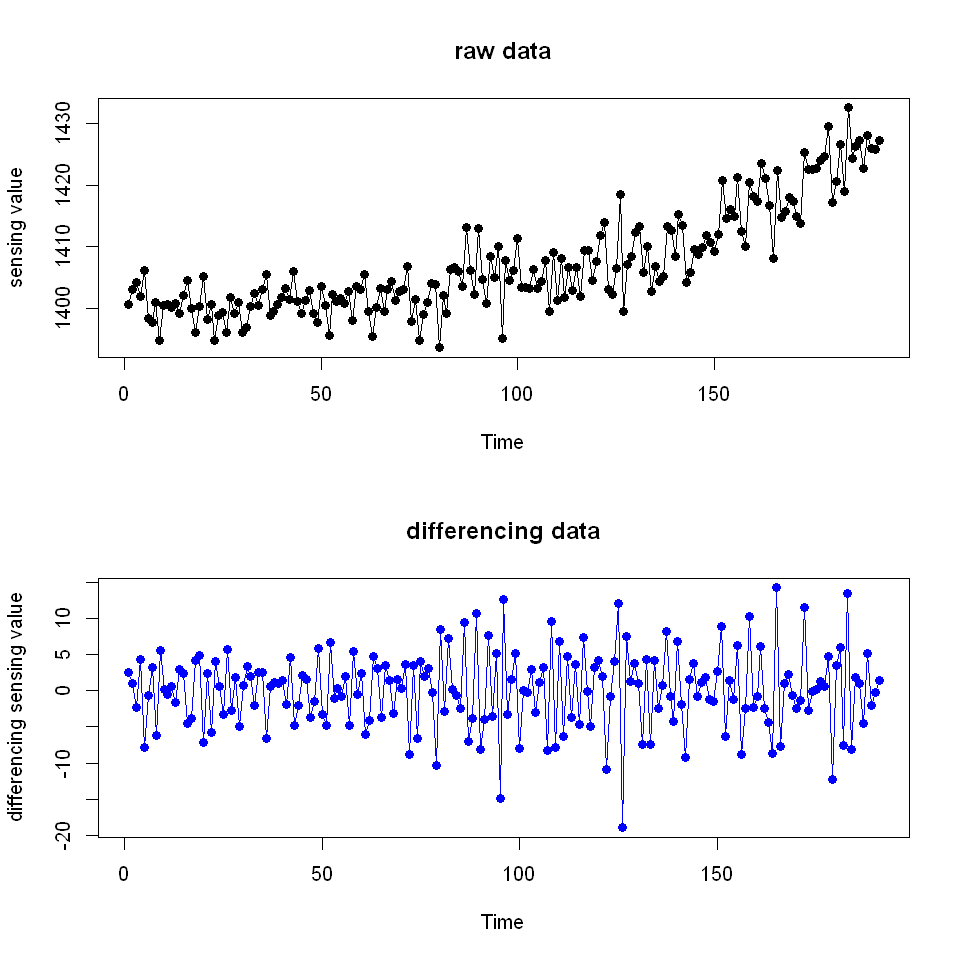

In [14]:
# raw 데이터 & differencing data 시각화
colNum = 5

par(mfrow=c(2,1))
options(repr.plot.width = 8, repr.plot.height = 8)

plot(trainM[,colNum], pch=16, type='o', main='raw data', xlab='Time', ylab='sensing value')
plot(diff(trainM[,colNum]), pch=16, type='o', main='differencing data', xlab='Time', ylab='differencing sensing value', col='blue')

<h4> - 위 그래프는 Raw 데이터와 차분한 데이터를 나타냄 </h4>
<h4> - 위 그래프를 봤을때, 해당 항공기 터빈엔진 데이터는 변동성이 굉장히 큰 데이터임 (노이즈가 많음) </h4>
<h4> - 추후에 Smoothing 작업을 통해 노이즈를 줄일 필요가 있음 </h4>

## Correlation Analysis

In [53]:
machineNum = 91
trainM =train[train$`Section-0`== machineNum,]
testM =test[test$`Section-0`== machineNum,] 

In [54]:
# install.packages('corrplot')
library(corrplot)


총수명 :  135

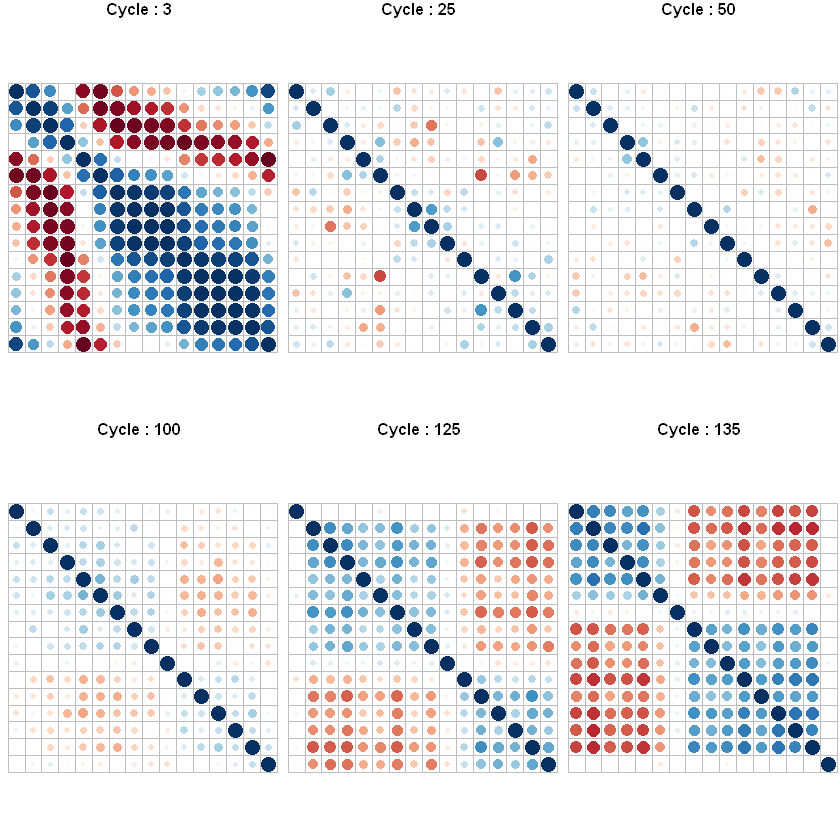

In [91]:
# corrplot of train data
par(mfrow=c(2,3))
options(repr.plot.width = 7, repr.plot.height = 7)
for(i in c(3,25, 50,100, 125, 135)){
    corr = cor(trainM[1:i,-1])
    corrplot(corr, title=paste0('Cycle : ', i), order='AOE',cl.pos="n",tl.pos="n", mar=c(0,0,1,0))
}
cat('\n총수명 : ', nrow(trainM))

- <h4> 위 그래프는 Machine 91의 Cycle 별 Correlation Plot을 나타냄</h4>
- <h4> 위 그래프를 봤을때, Correlation 값이 초반(Cycle: 3, 25)에 큰 값을 나타내고, </h4>
- <h4> 중간 지점 (Cycle : 25, 50)에서 값이 안정된 후, </h4> 
- <h4> 고장시점에 가까울 수록 Correlation 값이 커짐을 보임 (Cycle : 100, 125, 135) </h4>
- <h4> 이는 고장률 혹은 수명을 나타내는 Bathtub-Curve 분포와 유사한 형태를 띨 것으로 예상됨 </h4>

In [84]:
# 시뮬레이션 코드 (Rstudio에서 작동)
# for(i in 2:nrow(trainM)){
#   corr = cor(trainM[1:i,-1])
#   corrplot(corr)
#   Sys.sleep(0.5)
#   cat('\n총수명 : ', nrow(trainM))
#   cat('\ntime : ', i)
# }

In [106]:
## Train data correlation
trainCorL2normVec = c()
for(i in 3:nrow(trainM)){
  corr = cor(trainM[1:i,-1])
  corL2norm = sum(sqrt(corr^2)) - sum(sqrt(diag(corr^2)))
  trainCorL2normVec = append(trainCorL2normVec, corL2norm)
}

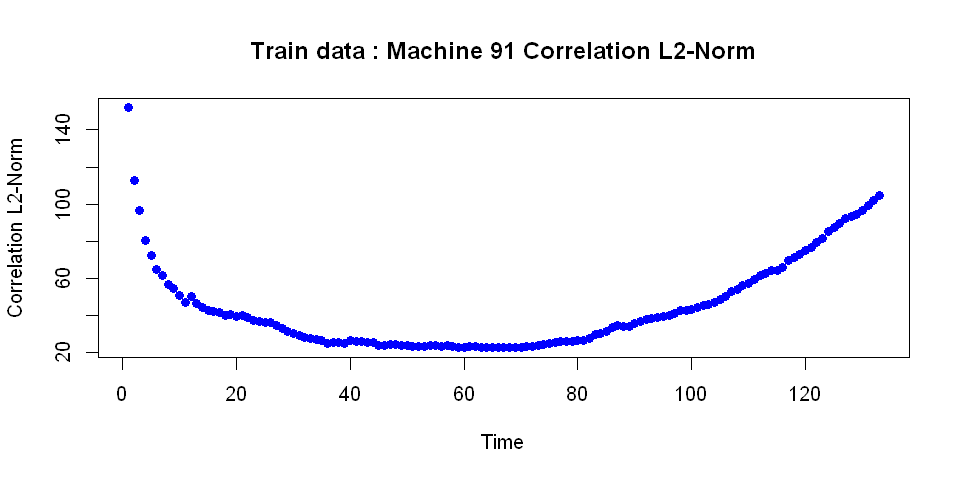

In [107]:
par(mfrow=c(1,1))
options(repr.plot.width = 8, repr.plot.height = 4)
plot(trainCorL2normVec, pch=16, xlab='Time', ylab='Correlation L2-Norm', main=paste0('Train data : Machine ', machineNum, ' Correlation L2-Norm'), col='blue')

- <h4> Correlation 값을 L2-norm을 이용해서 크기를 추출 후, 확인한 결과 Bathtub-Curve 분포의 형태를 띠는 것을 입증하였음</h4>
- <h4> Machine 91 뿐만 아니라 다른 데이터의 경우 위와 같은 Bathtub-Curve 형태를 띰</h4>
- <h4> 이는 Correlation 값이 Degradation 값으로 대체해서 사용할 수 있는 가능성을 나타냄</h4>
- <h4> 또한, 항공기 터빈 엔진에 이상이 생길때 유기적으로 다른 변수에도 영향을 주기 때문에 Correlation 값이 커짐은 자연스러운 현상으로 볼 수 있음</h4>

In [101]:
# EoL of test data
testEoL = read.table('E:\\데이터\\예지보전\\CMAPSSData\\EoL_FD001.txt')
testEoL = testEoL$V1


총수명 :  272

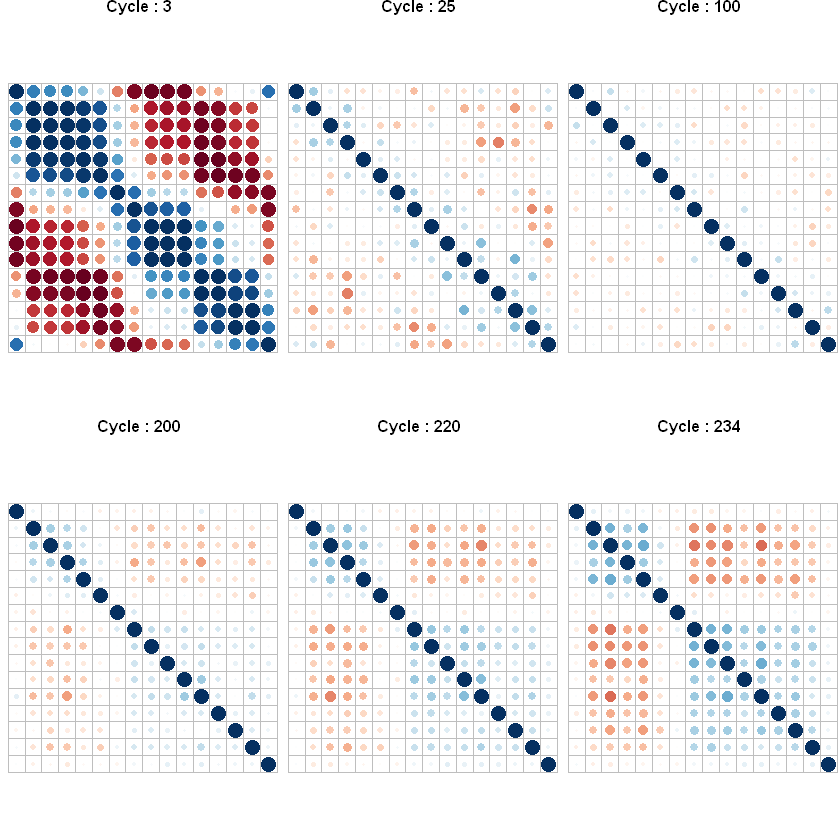

In [103]:
# corrplot of test data
par(mfrow=c(2,3))
options(repr.plot.width = 7, repr.plot.height = 7)
for(i in c(3,25,100,200,220,234)){
    corr = cor(testM[1:i,-1])
    corrplot(corr, title=paste0('Cycle : ', i), order='AOE',cl.pos="n",tl.pos="n", mar=c(0,0,1,0))
}
cat('\n총수명 : ', testEoL[machineNum])

- <h4> Train 데이터 뿐만 아니라 Test 데이터의 경우도 같은 패턴을 나타냄</h4>
- <h4> 위 그래프를 봤을때, Correlation 값이 초반(Cycle: 3, 25)에 큰 값을 나타내고, </h4>
- <h4> 중간 지점 (Cycle : 100, 200)에서 값이 안정된 후, </h4> 
- <h4> 고장시점에 가까울 수록 Correlation 값이 커짐을 보임 (Cycle : 220, 234) </h4>

In [108]:
# Test data correlation
testCorL2normVec = c()
for(i in 2:nrow(testM)){
  corr = cor(testM[1:i,-1])
  corL2norm = sum(sqrt(corr^2)) - sum(sqrt(diag(corr^2)))
  testCorL2normVec = append(testCorL2normVec, corL2norm)
}

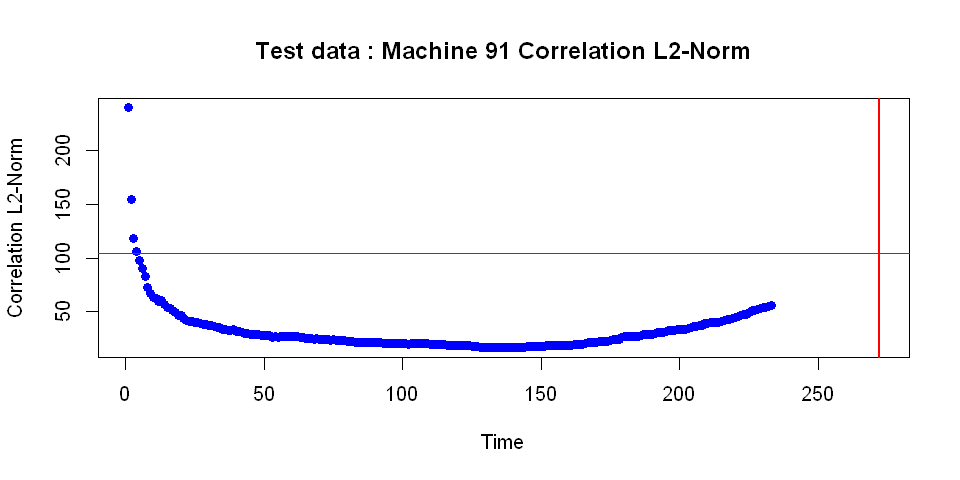

In [120]:
par(mfrow=c(1,1))
options(repr.plot.width = 8, repr.plot.height = 4)
plot(testCorL2normVec, pch=16, xlab='Time', ylab='Correlation L2-Norm', main=paste0('Test data : Machine ', machineNum, ' Correlation L2-Norm'), col='blue', xlim = c(1, testEoL[machineNum]))
abline(h=trainCorL2normVec[length(corL2normVec)], col='red') # PoF
abline(v=testEoL[machineNum], col='red', lwd=2) # test EoL

- <h4> 위 그래프는 Test 데이터의 Correlation 크기를 나타냄 </h4>
- <h4> 빨간색 수평선은 PoF 값을, 빨간색 수평선은 Test 데이터의 EoL 값을 나타냄</h4>
- <h4> Test EoL은 주어진 데이터로 산출했으며, PoF 값은 같은 기게 번호를 갖는 Train 데이터의 EoL 시점의 값을 사용하였음</h4>
- <h4> 위 그래프를 봤을 때 Correlation의 크기를 기반으로 수명 예측하는 것은 가능할 것으로 보임</h4>

## RUL Prediction : EWLR (Exponentially Weightd Linear Regression)

--------------------
information of RUL

current time: 233
predict time: 340.574
RUL: 107.574
--------------------

Test EoL : 272

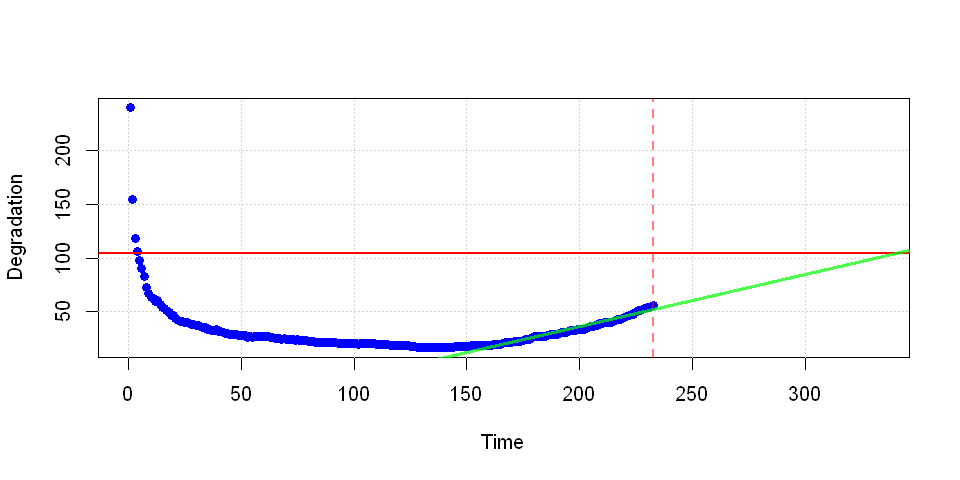

In [137]:
trainX = as.matrix(50:100)
trainY = as.matrix(trainCorL2normVec[50:100])
testX = as.matrix(1:length(testCorL2normVec))
testY = as.matrix(testCorL2normVec)
PoF = trainCorL2normVec[length(corL2normVec)]

w = exponential_weight(1:nrow(testY),testY, alpha=0.05)
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow=c(1,1))

RS = RULsystem(trainX, trainY, testX, testY, time=c(233,233), weight=w, mean_life=mean(trainEoL), alpha=0.05, failure_criteria = PoF, model='WLR', plot_type=T)
cat(sprintf('Test EoL : %d', testEoL[machineNum]))

- <h4> 위 그래프는 Correlation Analysis -> Correlation L2-Norm -> PoF based RUL prediction을 나타냄</h4>
- <h4> 빨간색 수평선은 PoF 값을, 초록색 회귀선은 수명 예측 모델을 나타냄</h4>
- <h4> 위 그래프를 봤을 때 에측수명(340)이 실제 EoL(272)과 거리가 멀지만, </h4>
- <h4> Degradation(Correlation L2-Norm)의 분포 형태와 PoF 값의 위치를 보면 합리적이라고 판단됨</h4>
- <h4>  예측의 경우 선형모델이 가지고 있는 한계점이므로</h4>
- <h4> 예측모델만 변경해준다면 충분히 좋은 성능을 낼 수 있을 것으로 보임</h4>


<h2><b> 결론</b></h2>

- <h4> 해당 script는 Correlation의 크기를 활용한 잔여수명 예측 가능 여부 판단을 목표로함 </h4>
- <h4> 이는 Correlation L2-Norm을 Degradation으로 사용할 수 있는지에 대한 실험으로 볼 수 있음 </h4>

- <h4> 본 프로세스는 Raw data -> Correlation Analysis -> Correlation L2-Norm -> PoF based RUL prediction 프로세스를 따름 </h4>
- <h4> 실험결과 Degradation(Correlation L2-Norm)의 분포 형태와 PoF 값의 위치를 보면 합리적이라고 판단됨 </h4>
- <h4> 예측성능의 경우 수명예측 모델만 비선형 모델로 변경해준다면 우수한 성능을 낼 것으로 판단됨</h4>